In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import csv
import matplotlib.patches as mpatches
import pylab as pb
import matplotlib.ticker as mtick

In [3]:
f1 = []
f2 = []





with open('fit_of_6s.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        f1.append(float(row[0]))
        f2.append(float(row[1]))
       
      
       
    
     

In [4]:
a1 = []
b1 = []





with open('voids_at_6s.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        a1.append(float(row[0]))
        b1.append(float(row[1]))
       
      
       
    
     

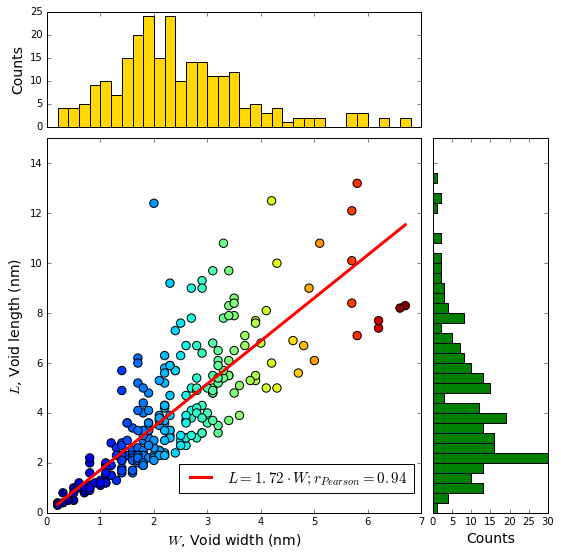

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# the random data
#x = np.random.randn(1000)
#y = np.random.randn(1000)

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

color = [str(item/255.) for item in b1]
# the scatter plot:
axScatter.scatter(b1, a1,s = 70, c = color)
axScatter.plot(f1,f2, c = 'red', lw = 3, label = '$L = 1.72 \cdot W; r_{Pearson} = 0.94$')
axScatter.set_xlabel('$W$, Void width (nm)', fontsize = 14)
axScatter.set_ylabel('$L$, Void length (nm)', fontsize = 14)
# now determine nice limits by hand:
binwidth_g = 0.4
binwidth_y = 0.2
xymax = np.max([np.max(np.fabs(b1)), np.max(np.fabs(a1))])
lim_y = (int(xymax/binwidth_y) + 1) * binwidth_y
lim_g = (int(xymax/binwidth_g) + 1) * binwidth_g

axScatter.set_xlim((0, 7))
axScatter.set_ylim((0, 15))

bins_g = np.arange(-lim_g, lim_g + binwidth_g, binwidth_g)
bins_y = np.arange(-lim_y, lim_y + binwidth_y, binwidth_y)
axHistx.hist(b1, bins=bins_y, color = 'gold')
axHisty.hist(a1, bins=bins_g, color = 'green',orientation='horizontal')

axHistx.set_xlim(0,7)
axHisty.set_ylim(0,15)

axHisty.set_xlabel('Counts', fontsize = 14)
axHistx.set_ylabel('Counts', fontsize = 14)
axScatter.legend(bbox_to_anchor=(1, 0.15),labelspacing=0.01, fontsize = 15)
plt.savefig("fig4b.png",bbox_inches='tight', dpi = 300)
plt.show()
